# Route_Dynamics Example Notebook

### ECS Data Science Showcase - Atlanta, GA - October 14, 2019

First, let's import all the packages we need:

In [1]:
#General imports needed for path
import os 
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

#import for plots
import matplotlib.pyplot as plt

In [3]:
#Import modules from route_dynamics package
from route_dynamics.route_energy import longi_dynam_model as ldm
from route_dynamics.route_riders import route_riders as ride
from route_dynamics.route_visualizer import visualizer as vis

Data required: Route GIS files, city elevation data, ridership

In [4]:
shapefile_name = '../data/six_routes.shp' #Route GIS files
rasterfile_name = '../data/seattle_dtm.tif' #Elevation data

In [5]:
# avalible routes: [48, 50, 75, 7, 45, 40]

This example will show results for Routes 7, 40, and 45.

In [28]:
#Select the time of day (AM/PM) and Inbound/Outbound for ridership data
df_7, riders_7, mass_7 = ride.route_ridership('PM', 'O', 7) 
stop_coord, rider_coord = ride.stop_coord(7, riders_7)
coords7 = rider_coord['coordinates'].values
mass7 = rider_coord['Mean'].values

df_40, riders_40, mass_40 = ride.route_ridership('PM', 'O', 40)
stop_coord, rider_coord = ride.stop_coord(40, riders_40)
coords40 = rider_coord['coordinates'].values
mass40 = rider_coord['Mean'].values

df_45, riders_45, mass_45 = ride.route_ridership('PM', 'O', 45)
stop_coord, rider_coord = ride.stop_coord(45, riders_45)
coords45 = rider_coord['coordinates'].values
mass45 = rider_coord['Mean'].values


In [29]:
ex7 = ldm.RouteTrajectory(
    7, 
    shapefile_name, 
    rasterfile_name,
    bus_speed_model='const_accel_between_stops_and_speed_lim',
    stop_coords=coords7,
    mass_array=mass7 + mass_7,
    a_m = 0.5
)

ex40 = ldm.RouteTrajectory(
    40, 
    shapefile_name, 
    rasterfile_name,
    bus_speed_model='const_accel_between_stops_and_speed_lim',
    stop_coords=coords40,
    mass_array=mass40 + mass_40,
    a_m = 0.5
)

ex45 = ldm.RouteTrajectory(
    45, 
    shapefile_name, 
    rasterfile_name,
    bus_speed_model='const_accel_between_stops_and_speed_lim',
    stop_coords=coords45,
    mass_array=mass45 + mass_45,
    a_m = 0.5
)


Energy required =267    8496.229209
Name: cum_distance, dtype: float64 J/m
Energy required =351    5993.30506
Name: cum_distance, dtype: float64 J/m
Energy required =207    11686.139084
Name: cum_distance, dtype: float64 J/m


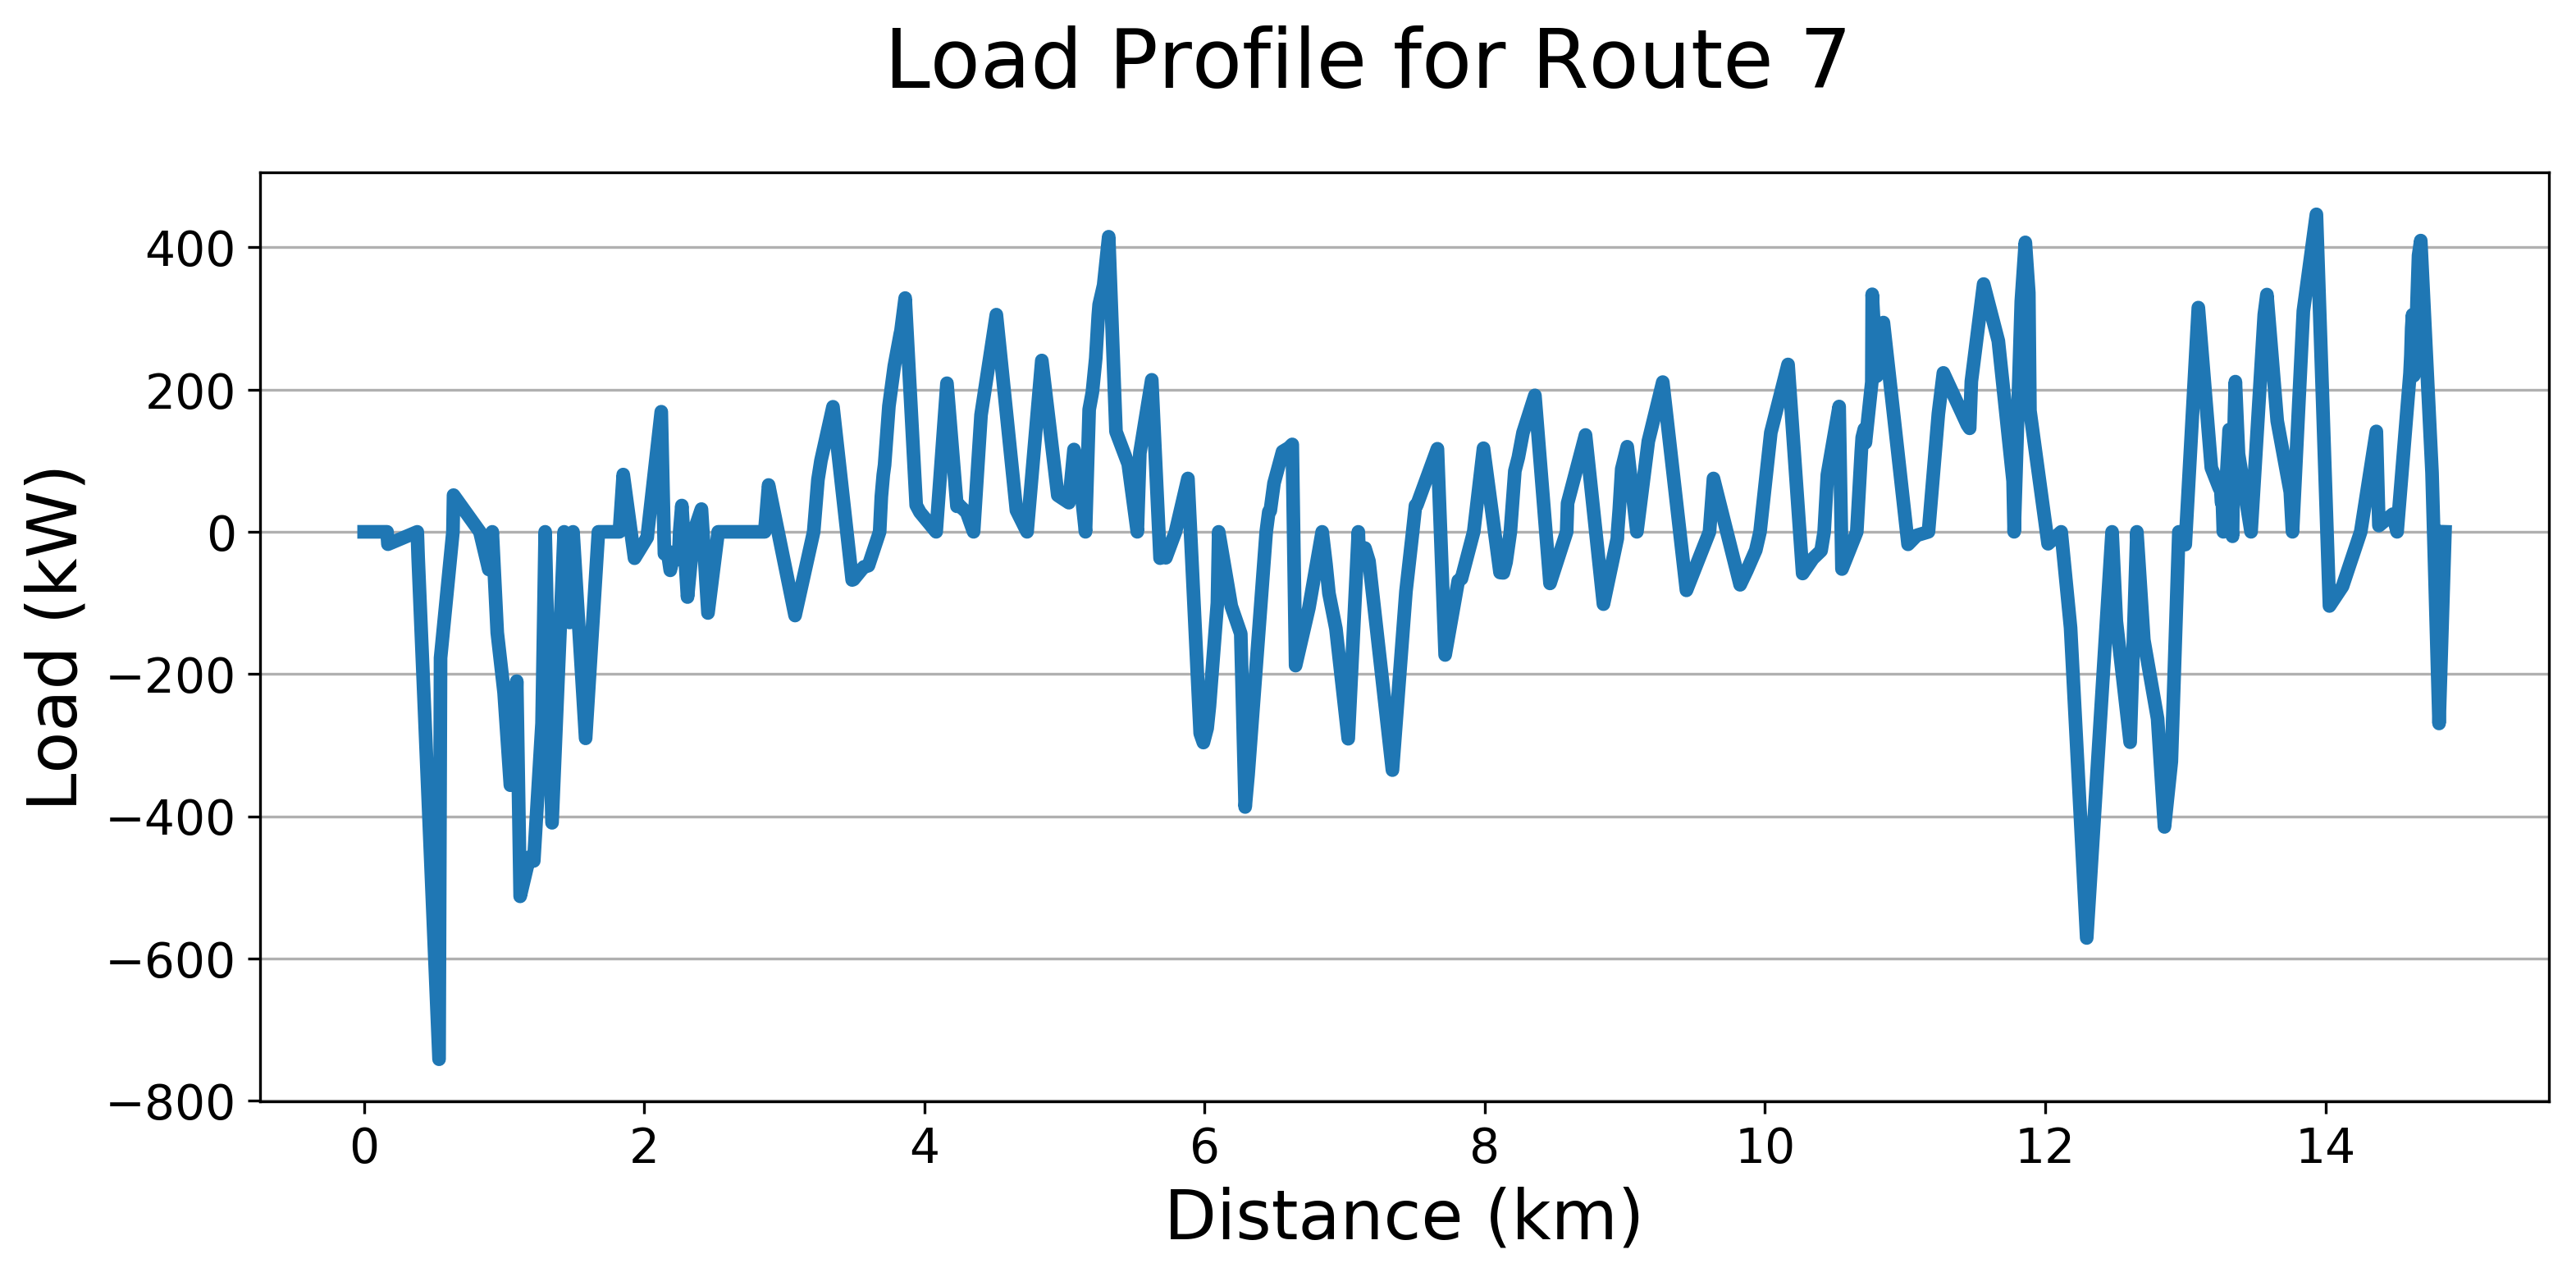

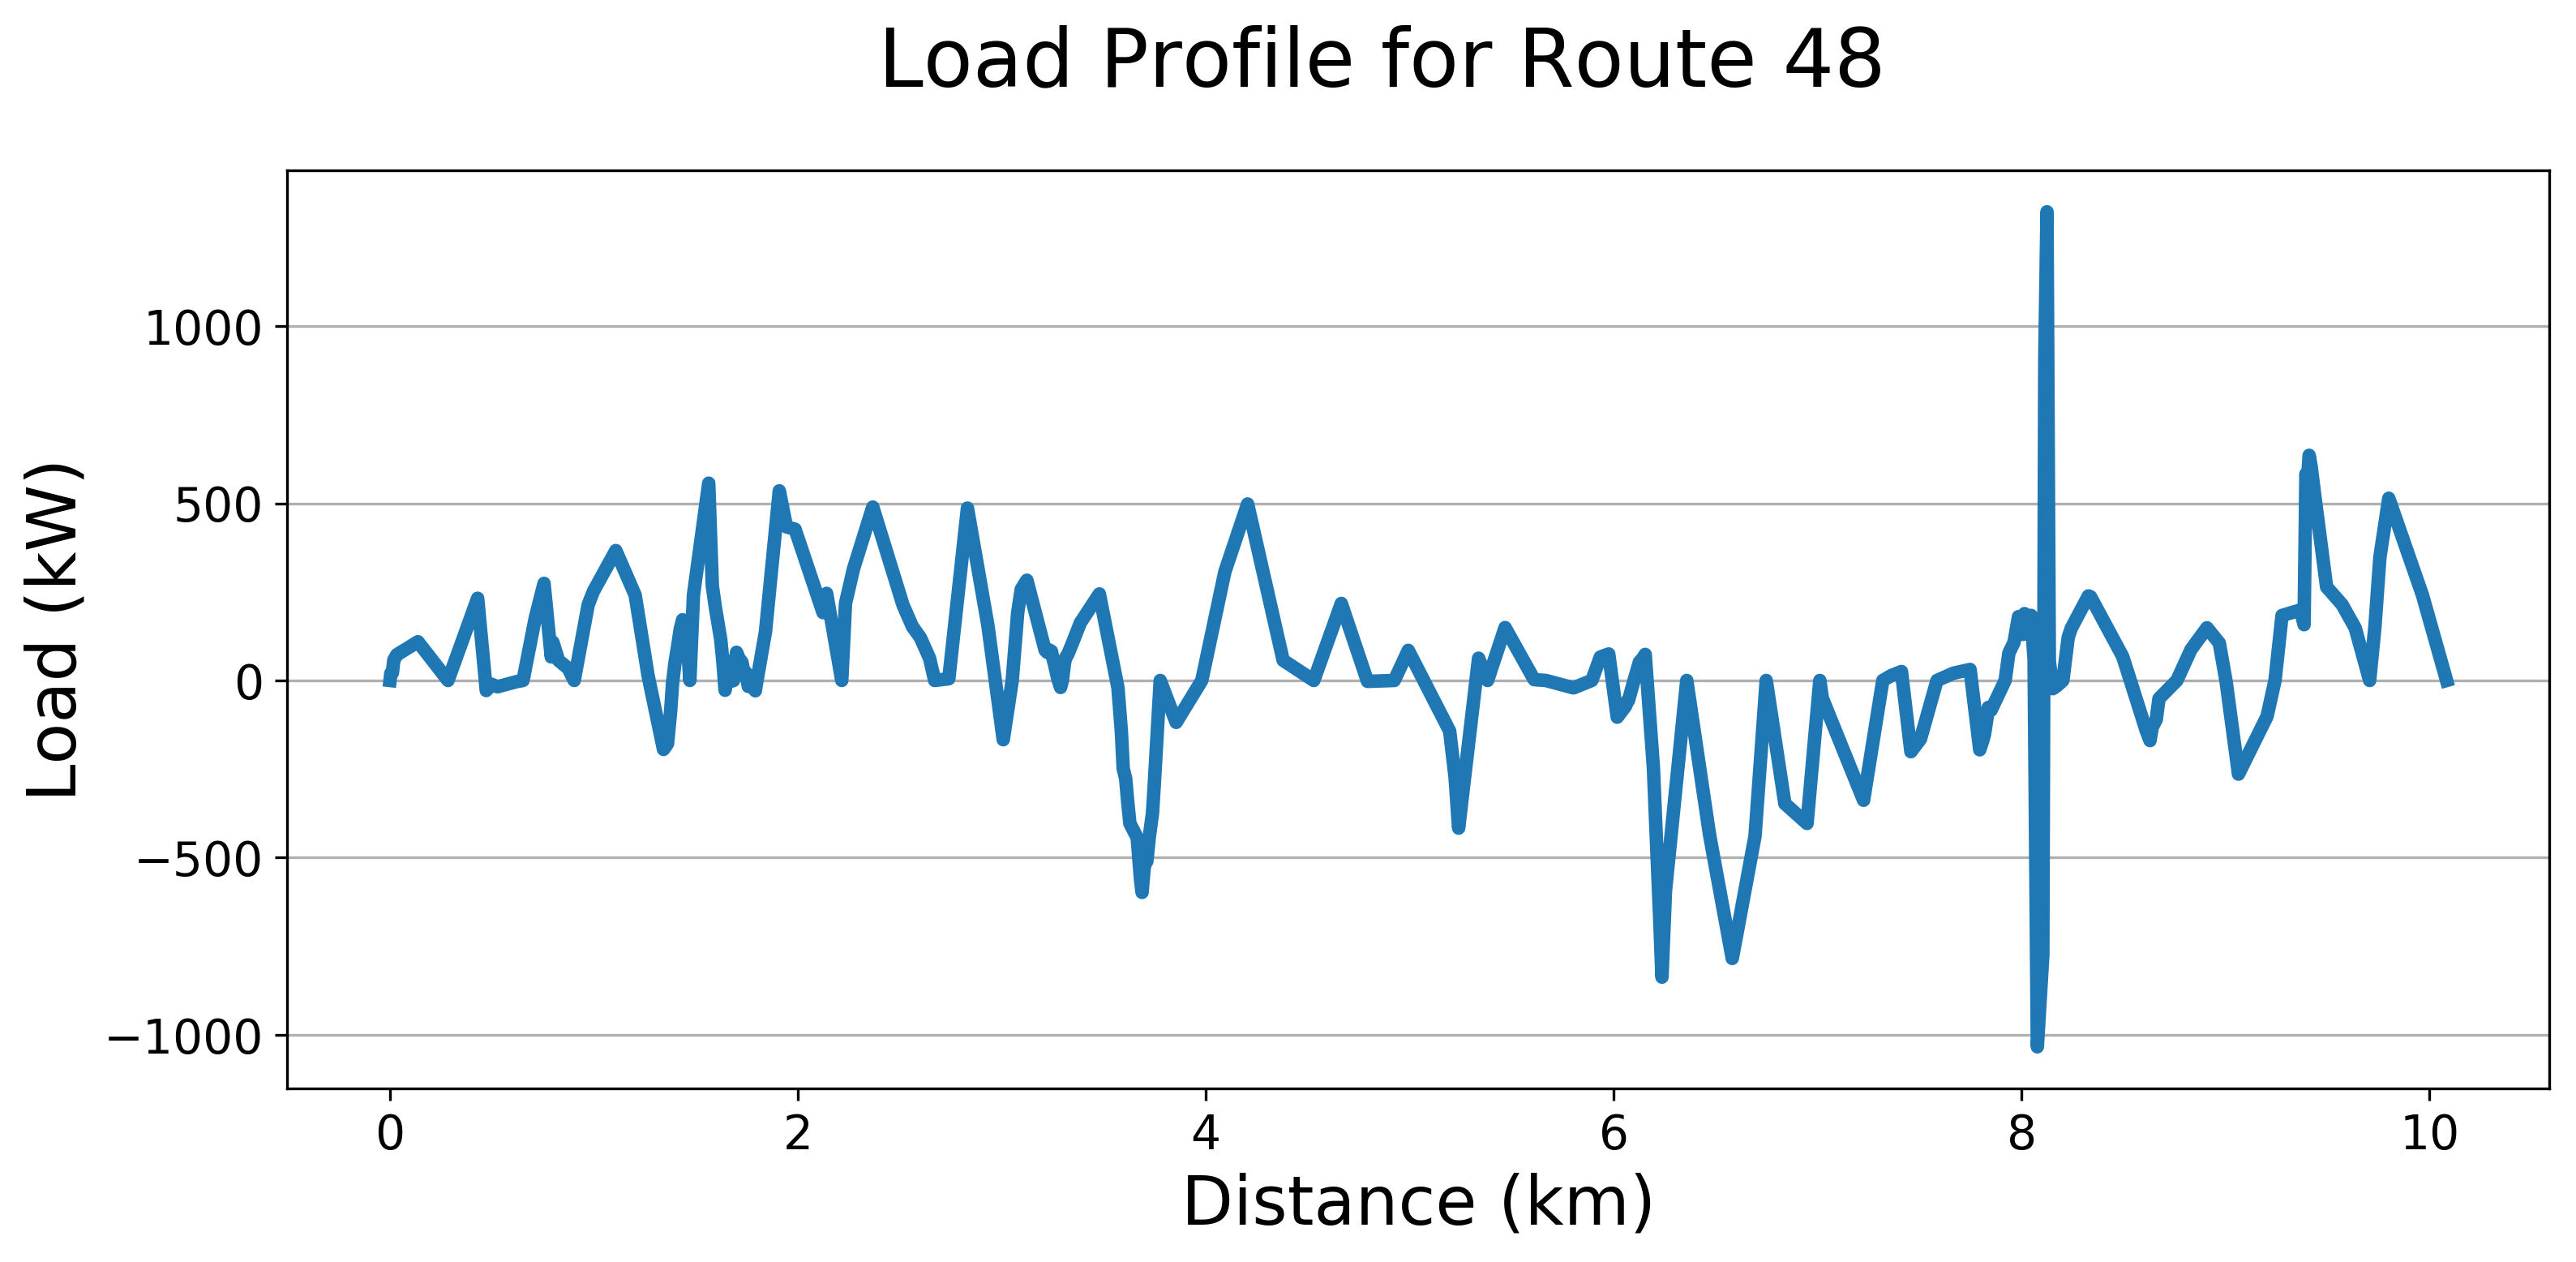

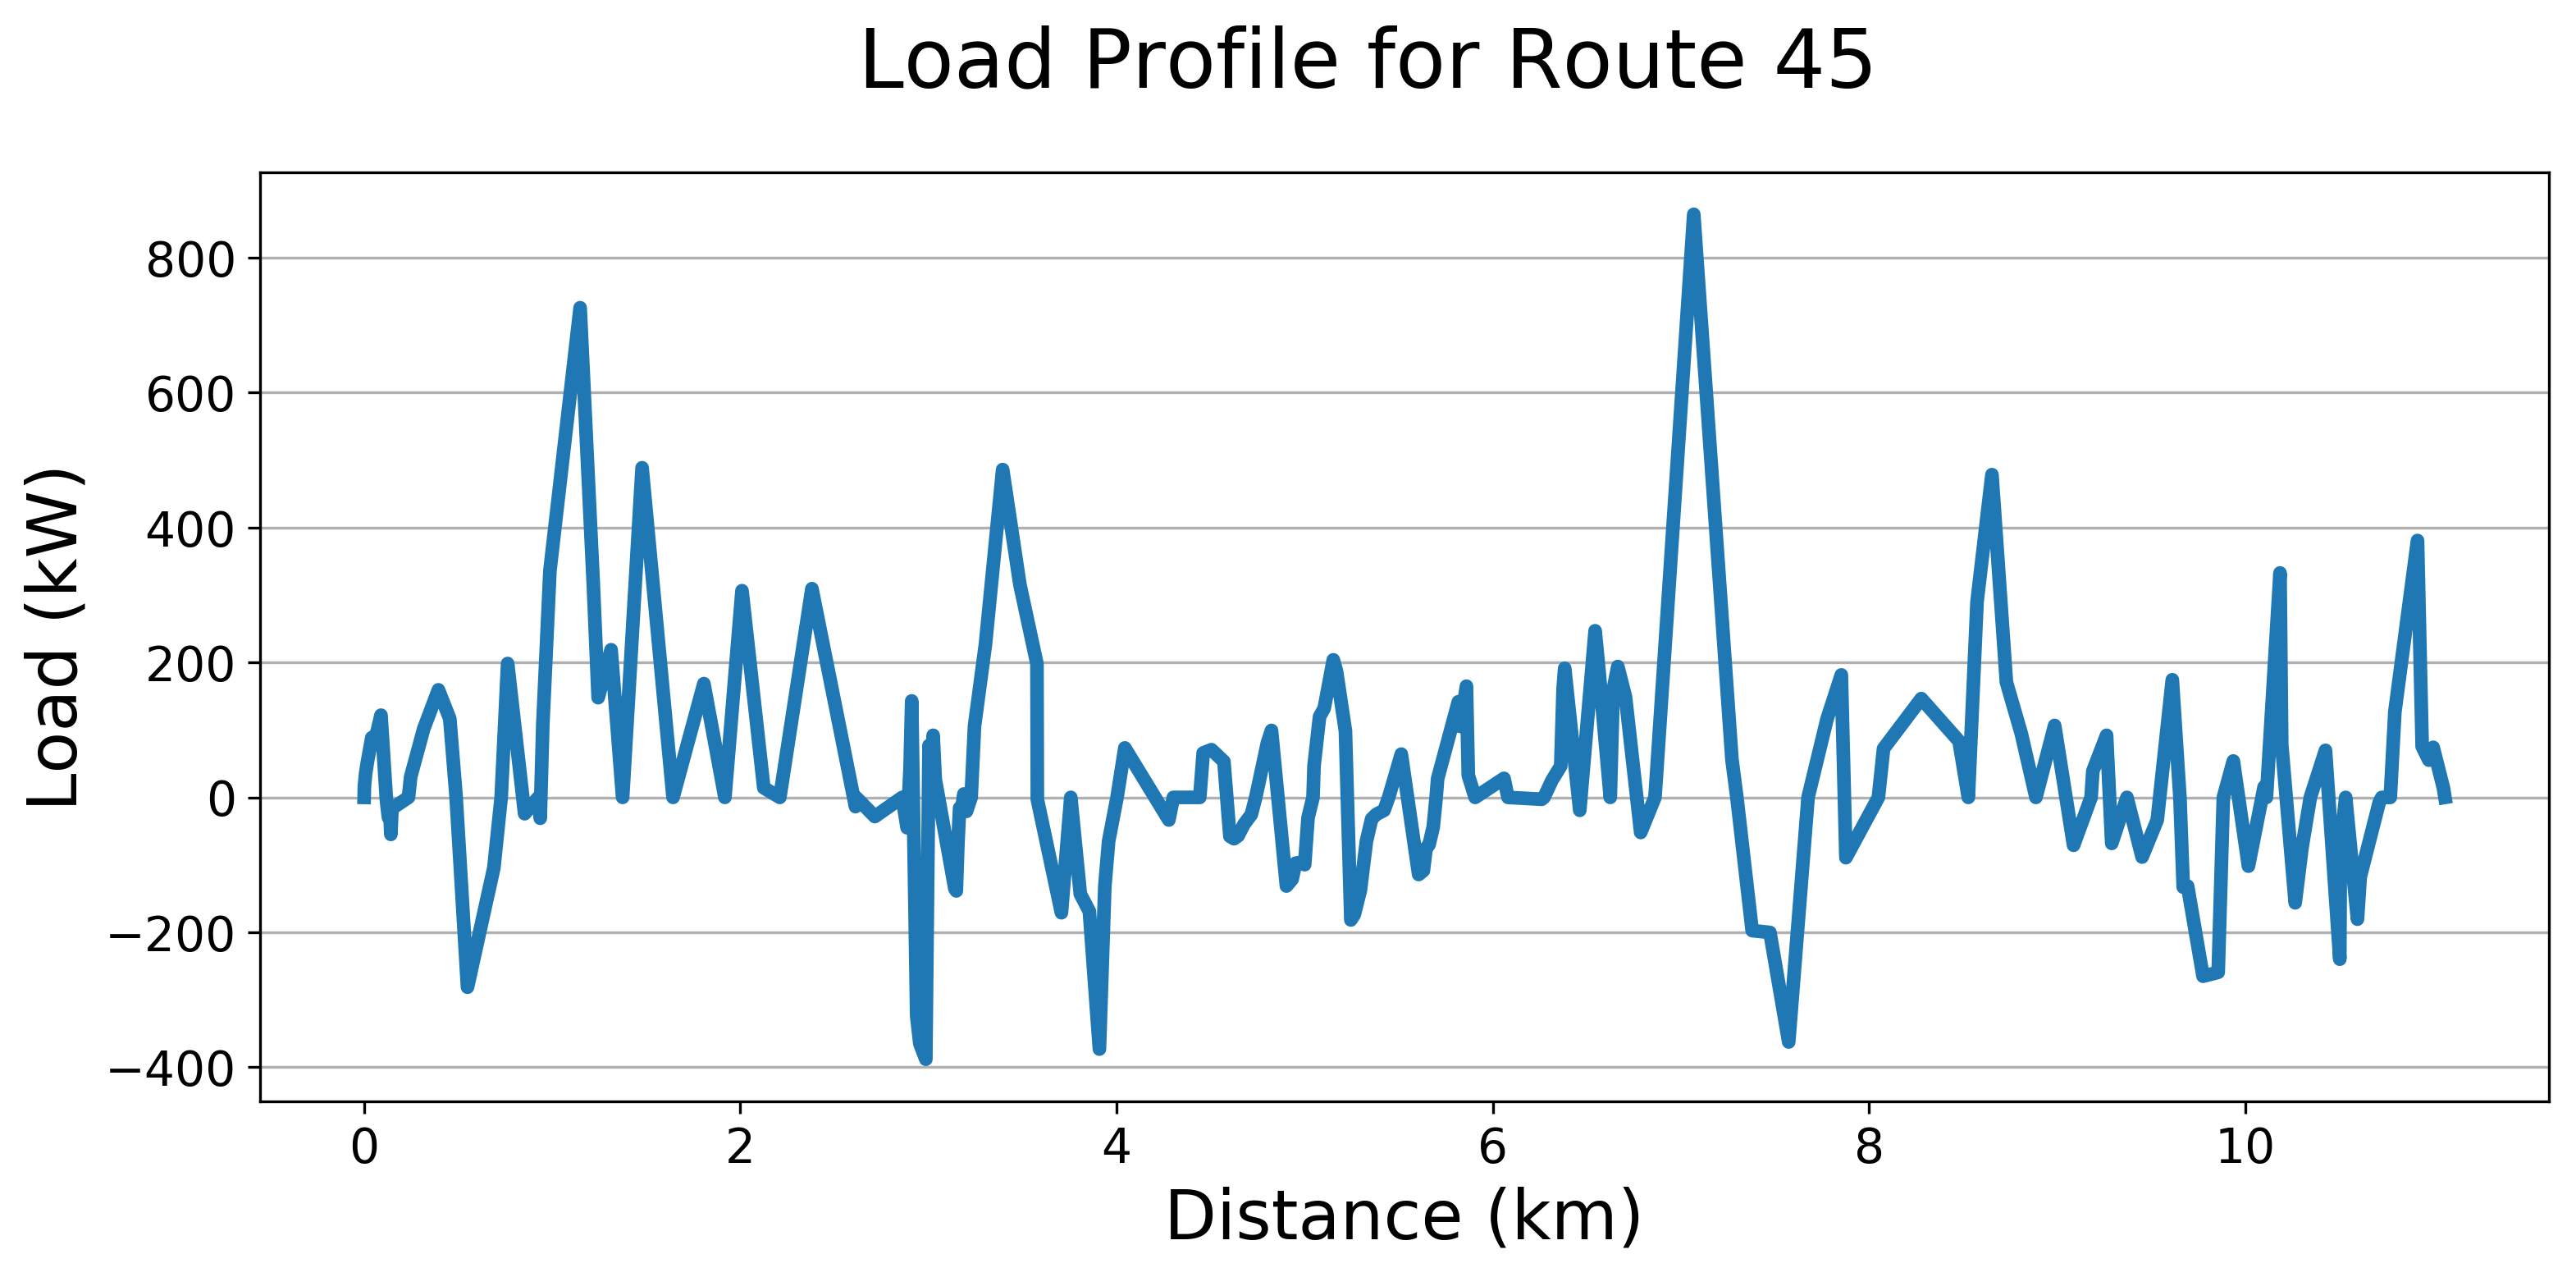

In [30]:
plot_7 = vis.profile_x(ex7.raw_batt_power_exert, ex7.route_df.cum_distance, 7)
print("Energy required ={} J/m".format(ex7.energy_from_route()/(ex7.route_df.cum_distance.tail(1))))

plot_40 = vis.profile_x(ex48.raw_batt_power_exert, ex48.route_df.cum_distance, 48)
print("Energy required ={} J/m".format(ex40.energy_from_route()/(ex40.route_df.cum_distance.tail(1))))
      
plot_45 = vis.profile_x(ex45.raw_batt_power_exert, ex45.route_df.cum_distance, 45)
print("Energy required ={} J/m".format(ex45.energy_from_route()/(ex45.route_df.cum_distance.tail(1))))

Now, we can make similar plots that also show the route elevation.

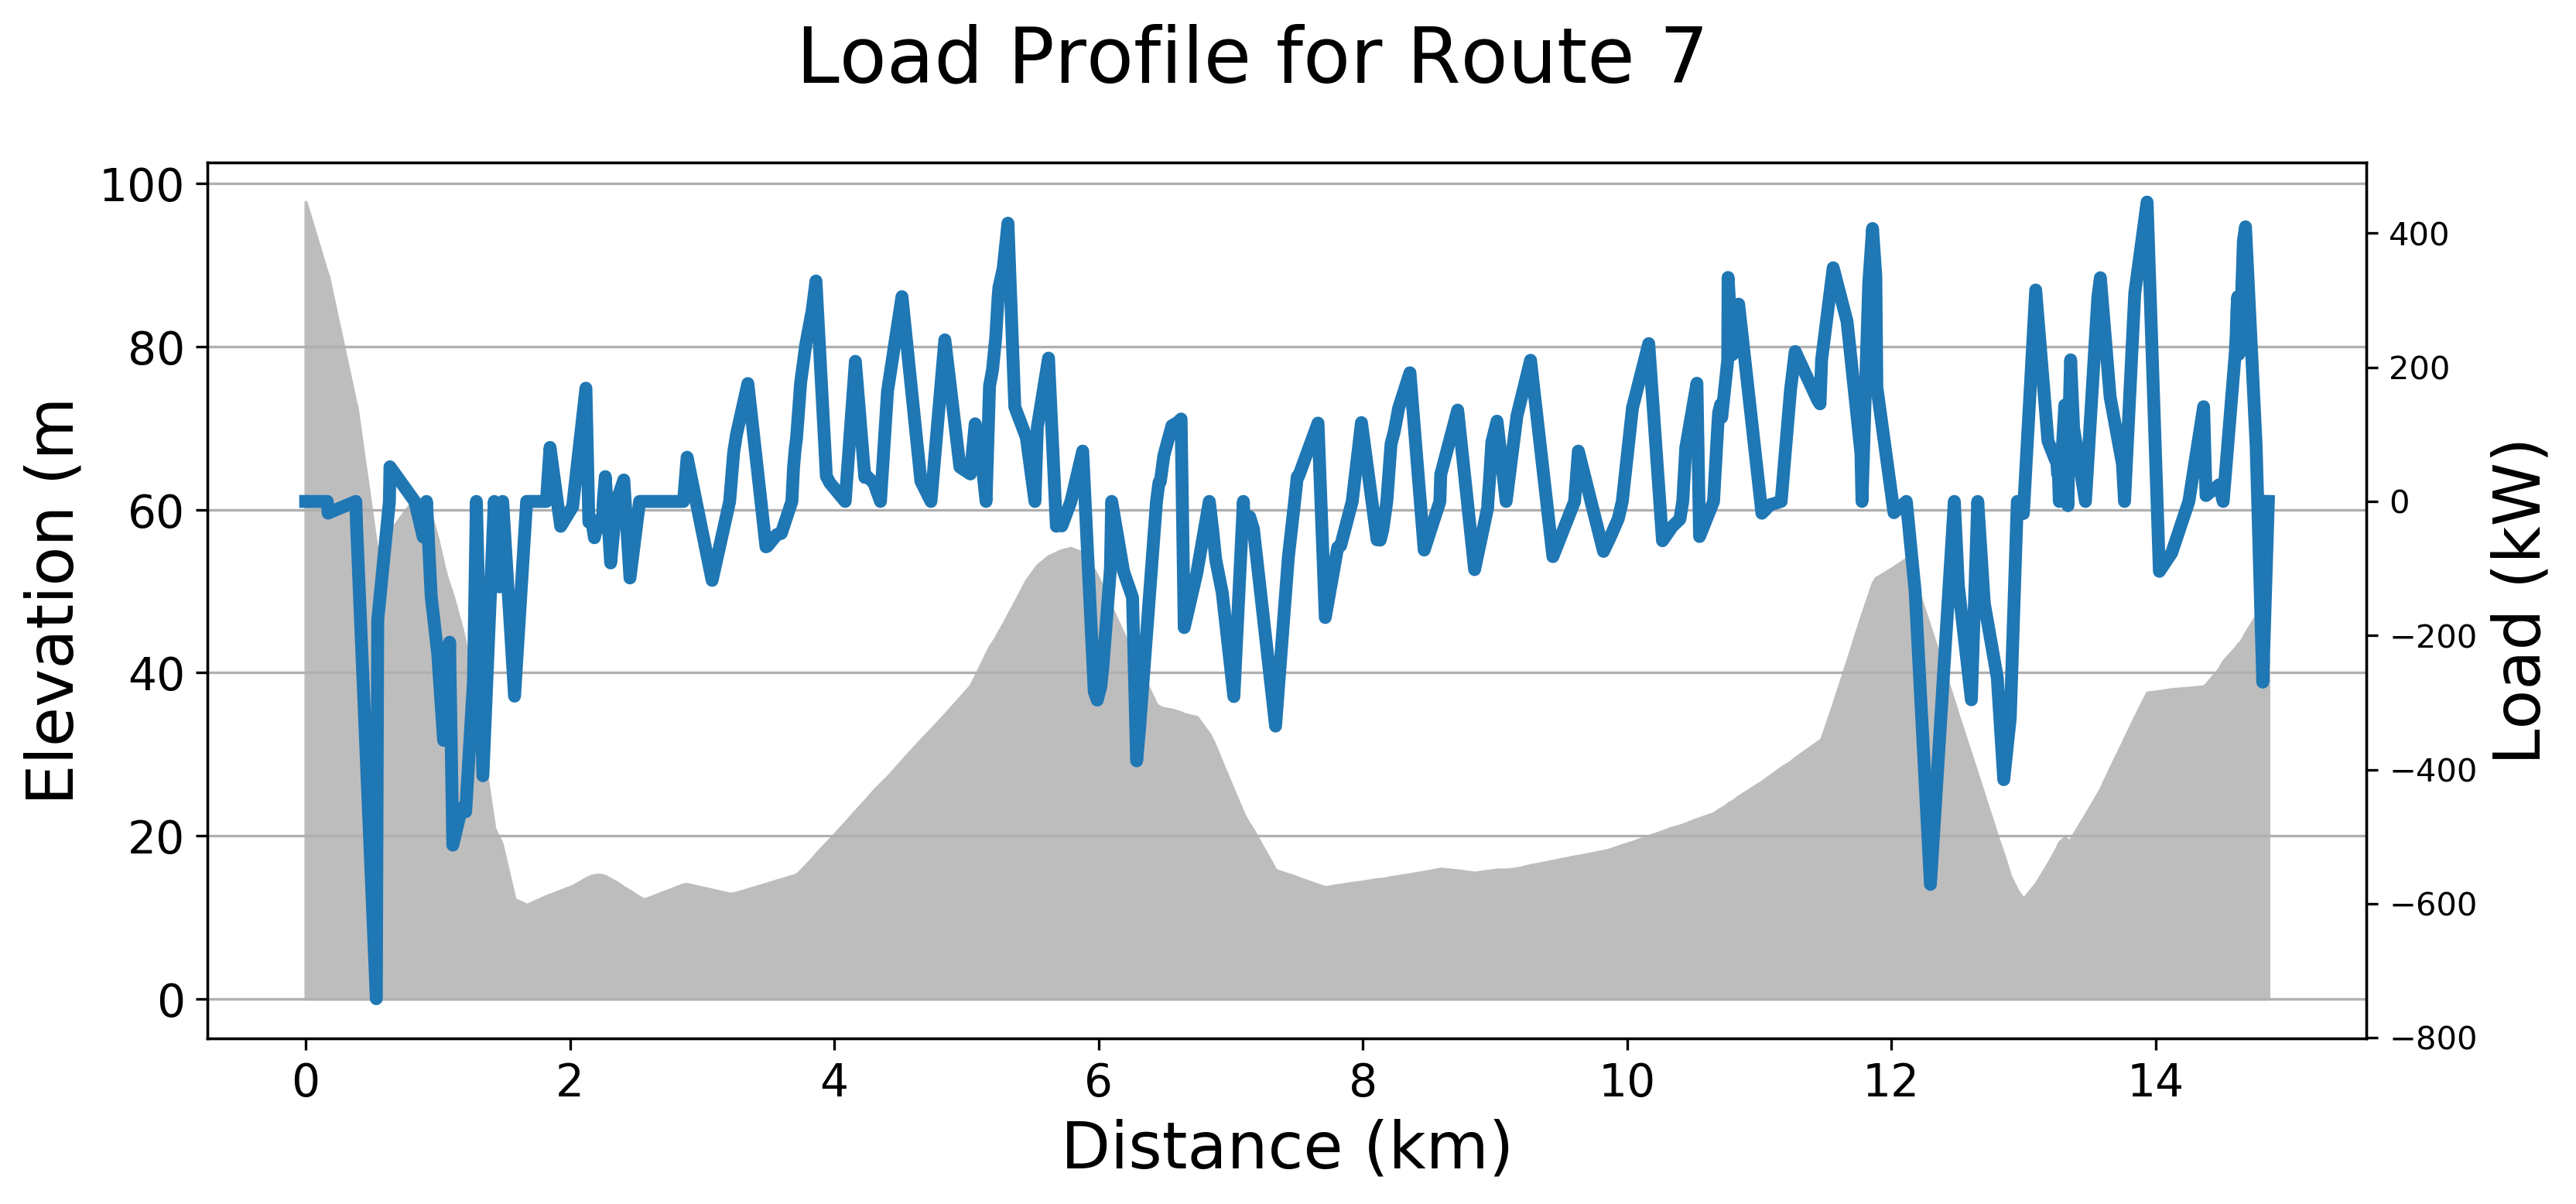

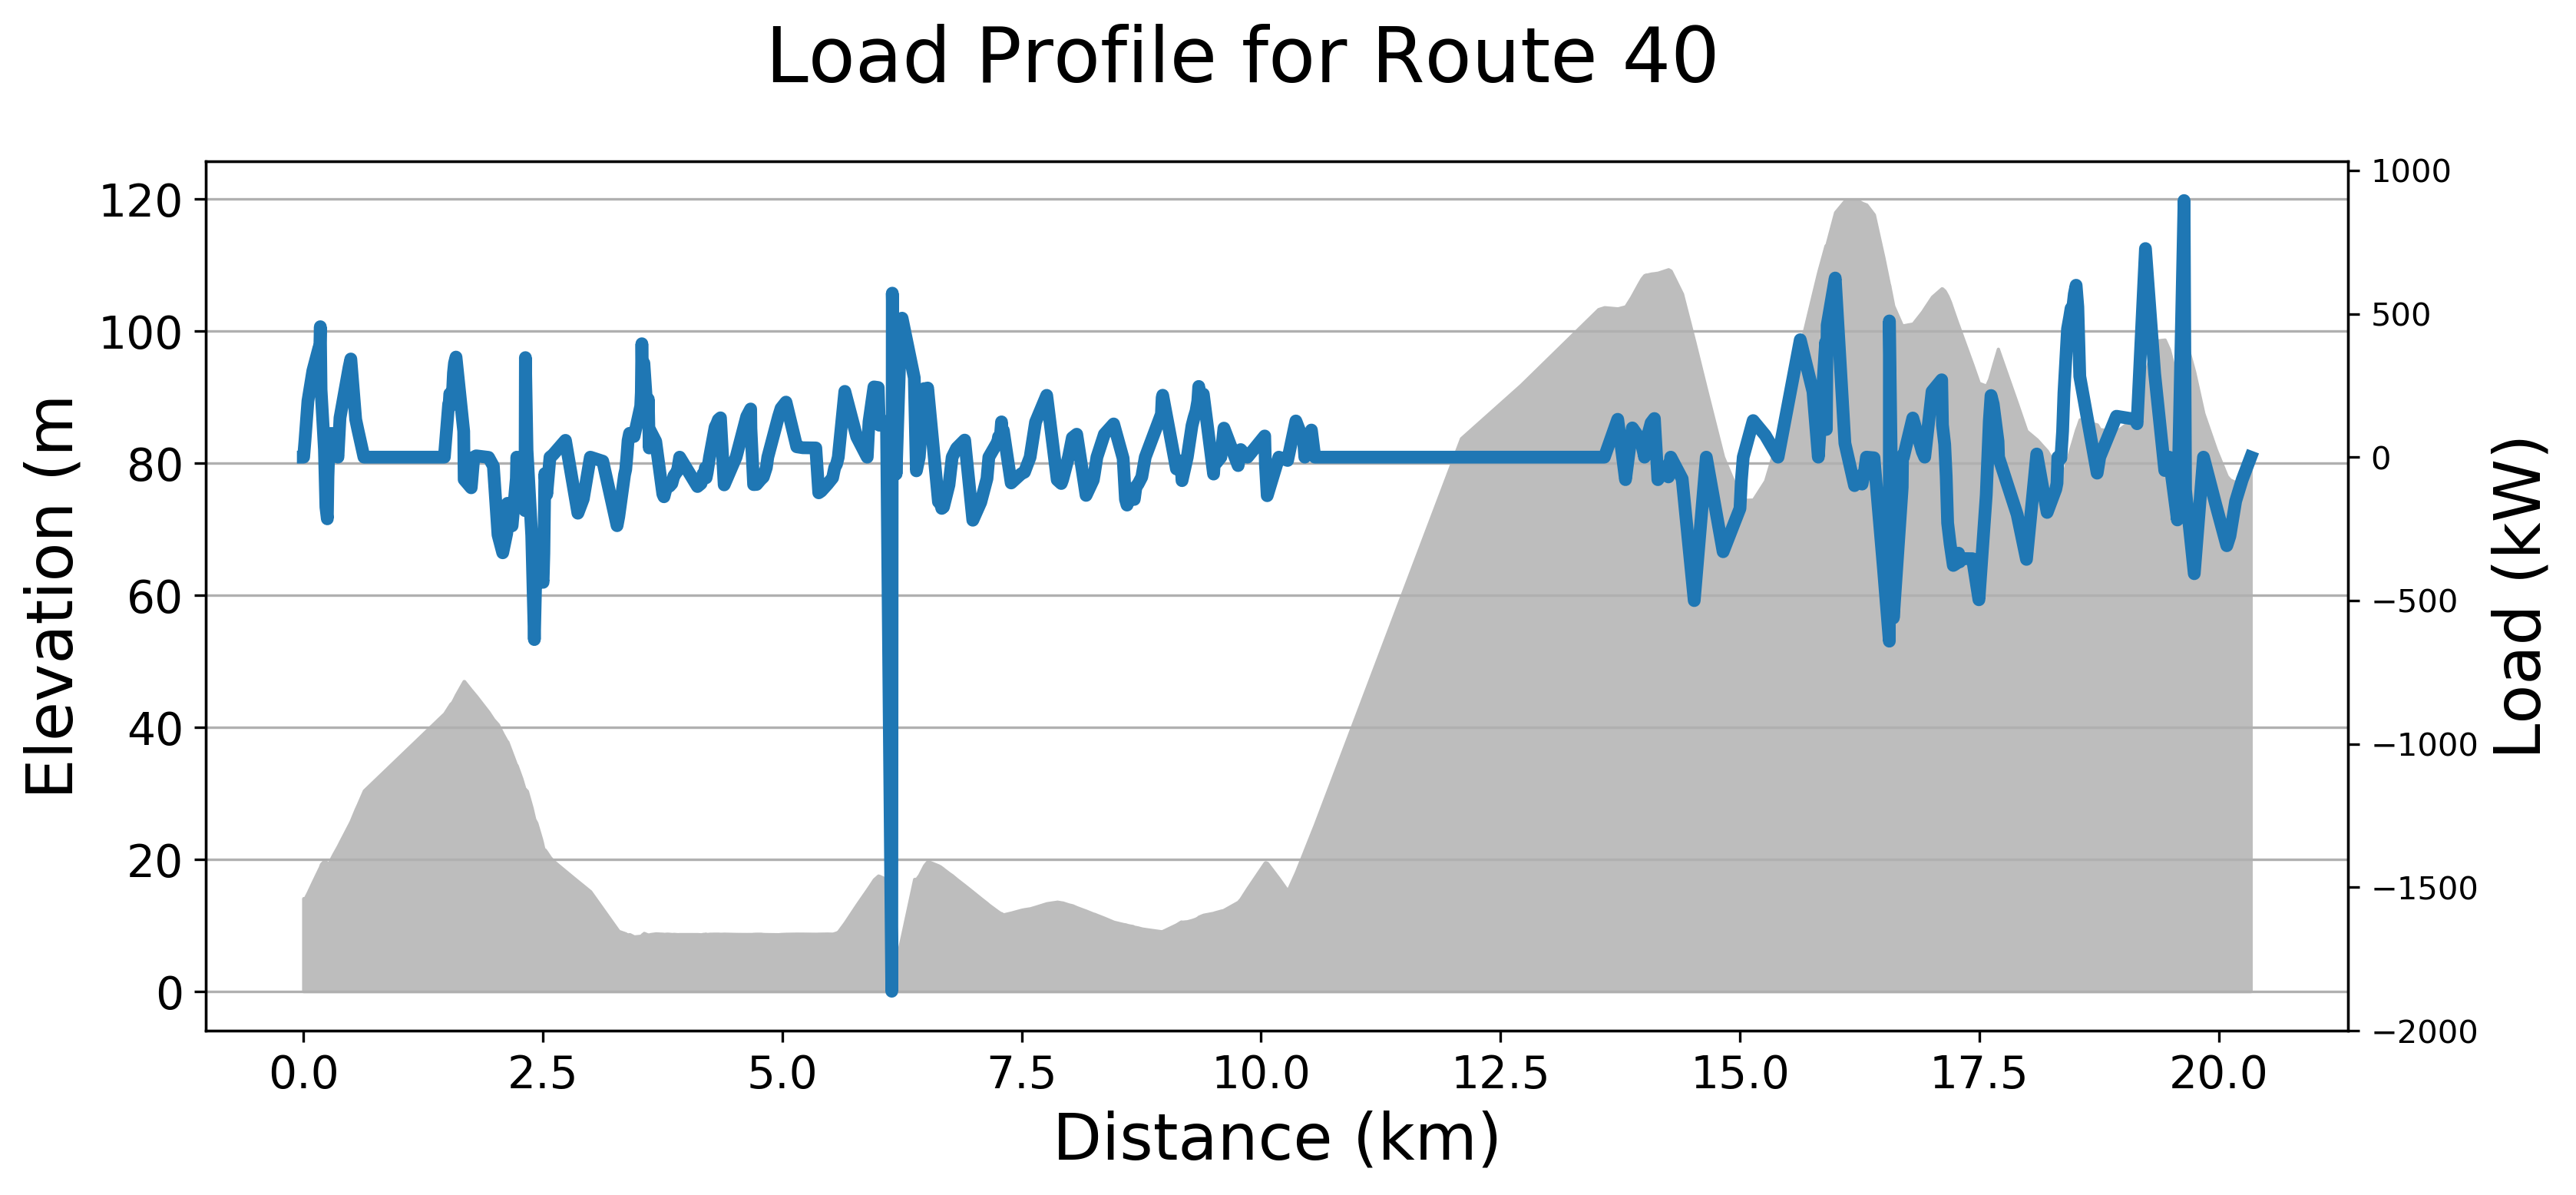

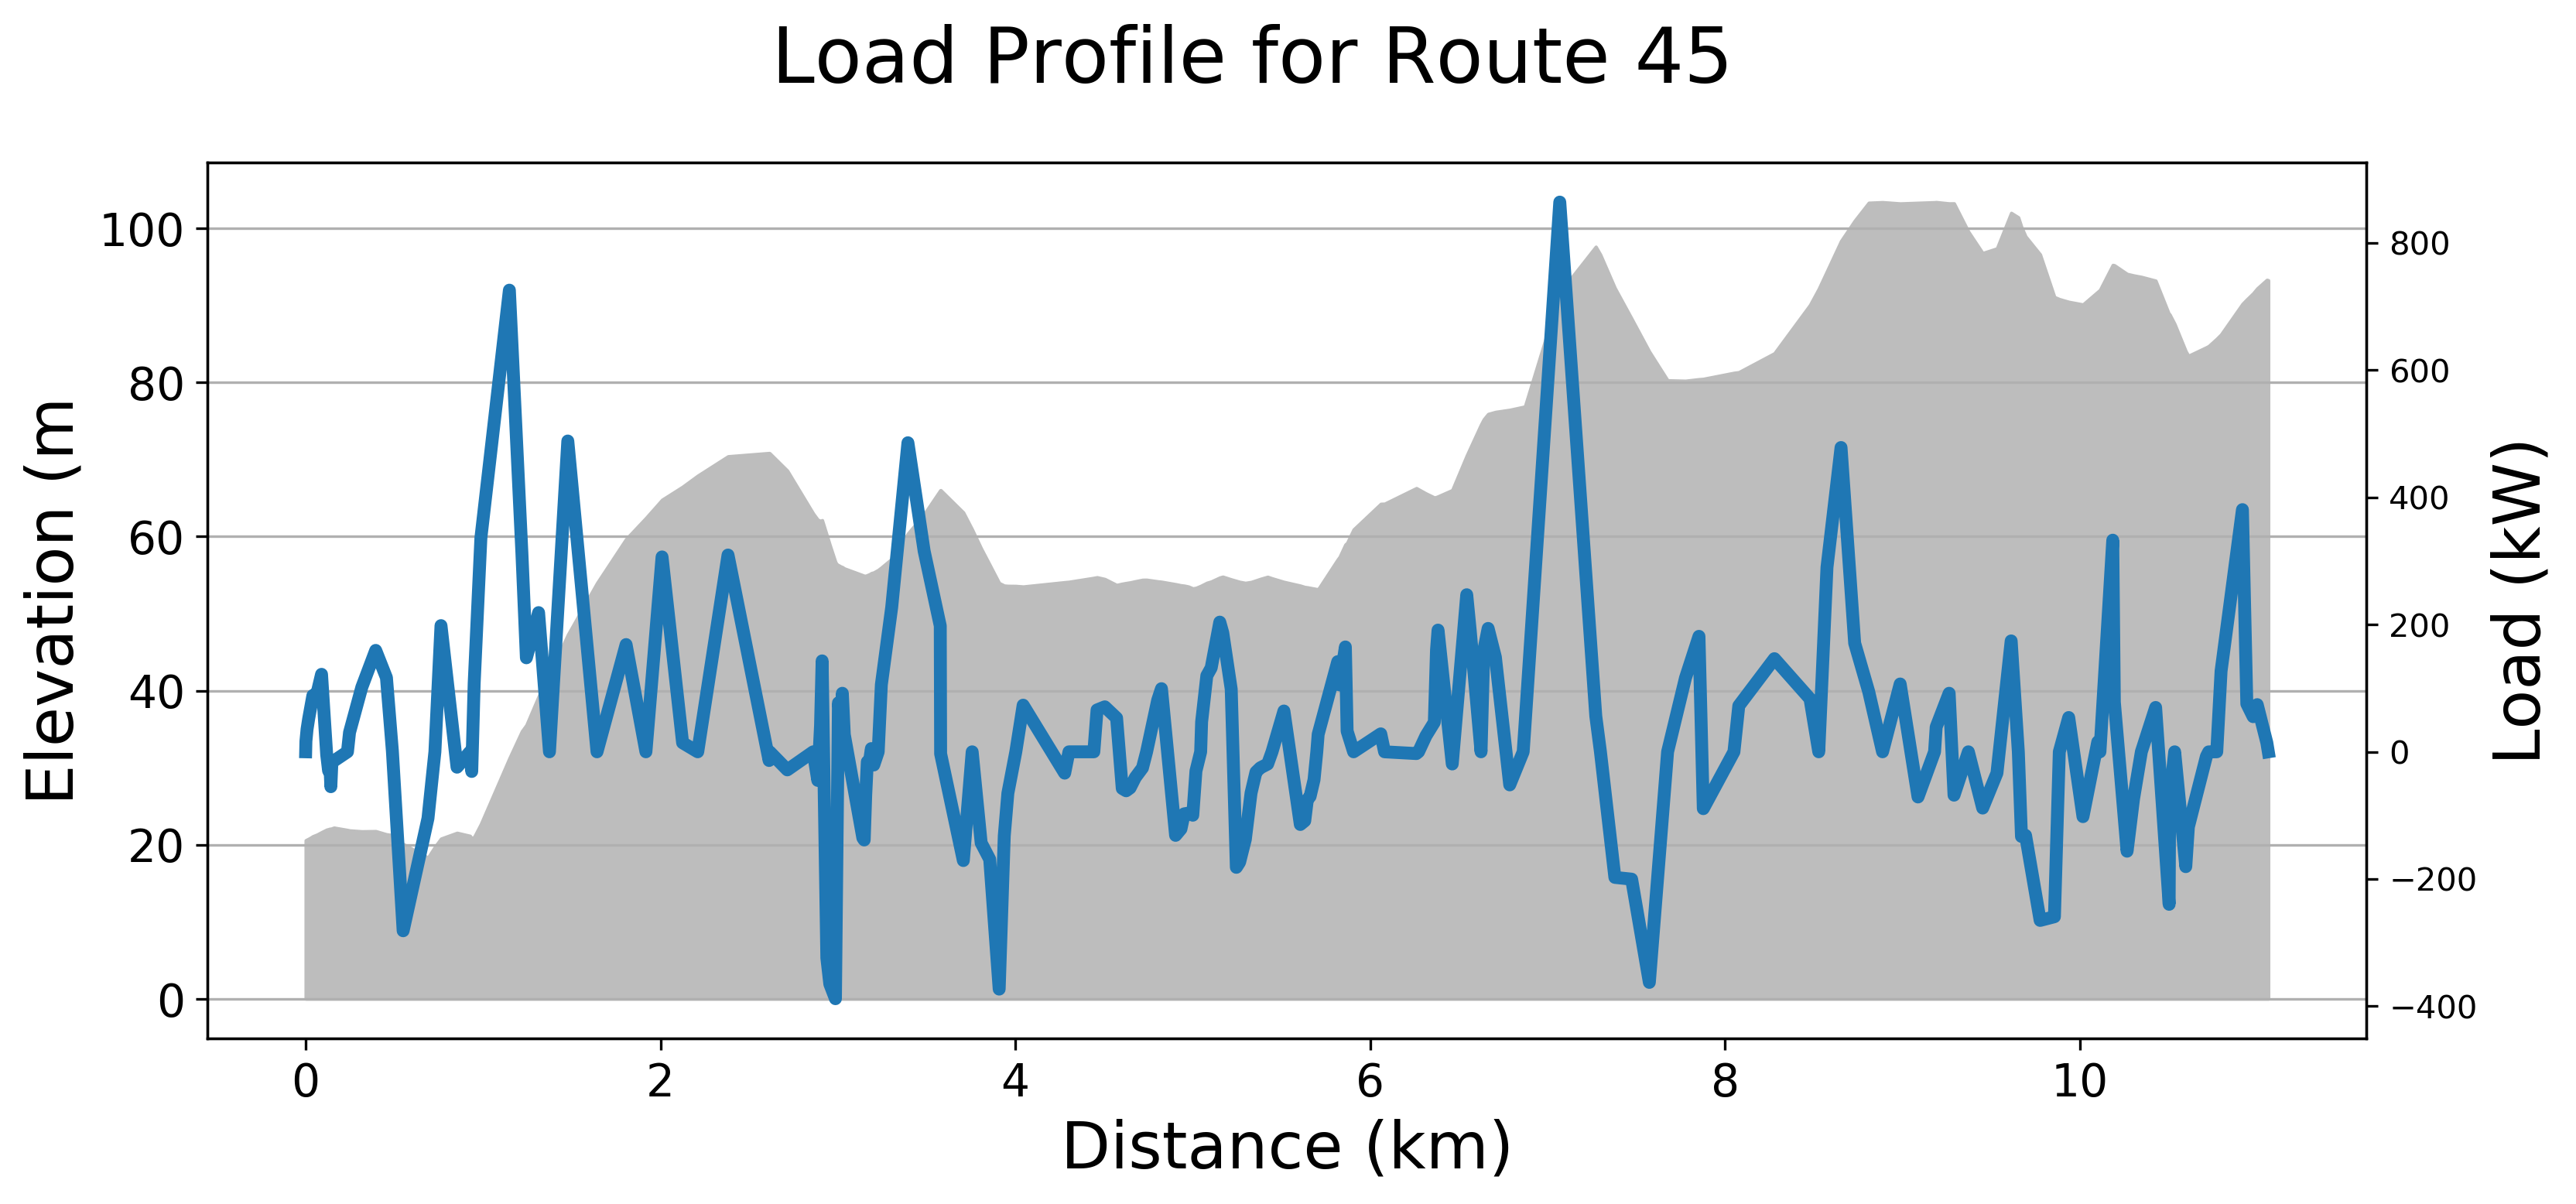

In [31]:
elev7 = vis.x_elev(ex7.raw_batt_power_exert, ex7.route_df.cum_distance, ex7.route_df.elevation, 7)
elev40 = vis.x_elev(ex40.raw_batt_power_exert, ex40.route_df.cum_distance, ex40.route_df.elevation, 40)
elev45 = vis.x_elev(ex45.raw_batt_power_exert, ex45.route_df.cum_distance, ex45.route_df.elevation, 45)

In [62]:
elev_7 = ex7.route_df.elevation
list_7 = elev_7.tolist()
list_7[-1]-list_7[0]

-55.85719825837798

In [66]:
elev_40 = ex40.route_df.elevation
list_40 = elev_40.tolist()
list_40[-1]-list_40[0]

64.80593287862446

In [65]:
elev_45 = ex45.route_df.elevation
list_45 = elev_45.tolist()
list_45[-1]-list_45[0]

72.71992861773359

We can also check where this route is on a map.

In [17]:
vis.route_map(7, shapefile_name, rasterfile_name)

In [32]:
vis.route_map(40, shapefile_name, rasterfile_name)

In [19]:
vis.route_map(45, shapefile_name, rasterfile_name)